국민건강보험공단, 건강보험심사평가원,「건강보험통계」, 2022 3/4, 2023.02.07, 시도별 종별 요양기관 현황    
https://kosis.kr/statHtml/statHtml.do?orgId=354&tblId=DT_MIRE01&conn_path=I2

In [2]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
hospital2022 = pd.read_csv('../../Data/public health/시도별 종별 요양기관 현황 2009_2022.csv', encoding='euc-kr')#, index_col='시점')
# hospital2022 = pd.read_csv('../../Data/public health/시도별 종별 요양기관 현황 2003_2008.csv', encoding='euc-kr')#, index_col='시점')
hospital2022.head()

,시점,시도별(1),계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,한방병원,한의원,보건의료원,보건소,보건지소,보건진료소,약국
0,2009.4/4,계,80270,44,269,1262,777,-,27027,183,14242,49,158,11782,17,239,1292,1914,21015
1,2009.4/4,서울,20560,17,42,167,65,-,7142,69,4395,6,29,3313,0,25,1,0,5289
2,2009.4/4,부산,5864,4,22,103,97,-,2065,9,1025,13,7,958,0,16,10,5,1530
3,2009.4/4,대구,4273,4,7,98,38,-,1460,17,709,1,8,734,0,8,9,9,1171
4,2009.4/4,인천,3643,2,12,50,35,-,1313,3,676,1,12,502,0,10,23,24,980


In [4]:
print(hospital2022.shape)
print(hospital2022.info())

(249, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      249 non-null    object
 1   시도별(1)  249 non-null    object
 2   계       249 non-null    int64 
 3   상급종합병원  249 non-null    int64 
 4   종합병원    249 non-null    int64 
 5   병원      249 non-null    int64 
 6   요양병원    249 non-null    int64 
 7   정신병원    249 non-null    object
 8   의원      249 non-null    int64 
 9   치과병원    249 non-null    int64 
 10  치과의원    249 non-null    int64 
 11  조산원     249 non-null    int64 
 12  한방병원    249 non-null    int64 
 13  한의원     249 non-null    int64 
 14  보건의료원   249 non-null    int64 
 15  보건소     249 non-null    int64 
 16  보건지소    249 non-null    int64 
 17  보건진료소   249 non-null    int64 
 18  약국      249 non-null    int64 
dtypes: int64(16), object(3)
memory usage: 37.1+ KB
None


In [5]:
# 시점 컬럼을 yyyy 형태로 바꾼 뒤, index로 변환
hospital_willIndex = hospital2022['시점']
hospital_willIndex = list(hospital_willIndex)
for i in range(0,len(hospital_willIndex)):
    hospital_willIndex[i] = hospital_willIndex[i].split('.')[0]
hospital2022['시점'] = hospital_willIndex
hospital2022.head()


,시점,시도별(1),계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,한방병원,한의원,보건의료원,보건소,보건지소,보건진료소,약국
0,2009,계,80270,44,269,1262,777,-,27027,183,14242,49,158,11782,17,239,1292,1914,21015
1,2009,서울,20560,17,42,167,65,-,7142,69,4395,6,29,3313,0,25,1,0,5289
2,2009,부산,5864,4,22,103,97,-,2065,9,1025,13,7,958,0,16,10,5,1530
3,2009,대구,4273,4,7,98,38,-,1460,17,709,1,8,734,0,8,9,9,1171
4,2009,인천,3643,2,12,50,35,-,1313,3,676,1,12,502,0,10,23,24,980


In [6]:
hospital2022.index=hospital2022['시점']
hospital2022 = hospital2022.iloc[:,1:]
hospital2022.head()


,시도별(1),계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,한방병원,한의원,보건의료원,보건소,보건지소,보건진료소,약국
시점,,,,,,,,,,,,,,,,,,
2009,계,80270,44,269,1262,777,-,27027,183,14242,49,158,11782,17,239,1292,1914,21015
2009,서울,20560,17,42,167,65,-,7142,69,4395,6,29,3313,0,25,1,0,5289
2009,부산,5864,4,22,103,97,-,2065,9,1025,13,7,958,0,16,10,5,1530
2009,대구,4273,4,7,98,38,-,1460,17,709,1,8,734,0,8,9,9,1171
2009,인천,3643,2,12,50,35,-,1313,3,676,1,12,502,0,10,23,24,980


In [7]:
# 시도별 이름 변경
hospital2022.columns
columns = ['시도별', '계', '상급종합병원', '종합병원', '병원', '요양병원', '정신병원', '의원', '치과병원',
       '치과의원', '조산원', '한방병원', '한의원', '보건의료원', '보건소', '보건지소', '보건진료소', '약국']
hospital2022.columns = columns
hospital2022.head()

,시도별,계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,한방병원,한의원,보건의료원,보건소,보건지소,보건진료소,약국
시점,,,,,,,,,,,,,,,,,,
2009,계,80270,44,269,1262,777,-,27027,183,14242,49,158,11782,17,239,1292,1914,21015
2009,서울,20560,17,42,167,65,-,7142,69,4395,6,29,3313,0,25,1,0,5289
2009,부산,5864,4,22,103,97,-,2065,9,1025,13,7,958,0,16,10,5,1530
2009,대구,4273,4,7,98,38,-,1460,17,709,1,8,734,0,8,9,9,1171
2009,인천,3643,2,12,50,35,-,1313,3,676,1,12,502,0,10,23,24,980


In [8]:
hospital2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 2009 to 2022
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     249 non-null    object
 1   계       249 non-null    int64 
 2   상급종합병원  249 non-null    int64 
 3   종합병원    249 non-null    int64 
 4   병원      249 non-null    int64 
 5   요양병원    249 non-null    int64 
 6   정신병원    249 non-null    object
 7   의원      249 non-null    int64 
 8   치과병원    249 non-null    int64 
 9   치과의원    249 non-null    int64 
 10  조산원     249 non-null    int64 
 11  한방병원    249 non-null    int64 
 12  한의원     249 non-null    int64 
 13  보건의료원   249 non-null    int64 
 14  보건소     249 non-null    int64 
 15  보건지소    249 non-null    int64 
 16  보건진료소   249 non-null    int64 
 17  약국      249 non-null    int64 
dtypes: int64(16), object(2)
memory usage: 37.0+ KB


In [9]:
# 정신병원 column'-' 를 0으로 변환, values int로 변환

hospital2022['정신병원'][hospital2022['정신병원']== '-'] = 0
hospital2022['정신병원'] = hospital2022['정신병원'].astype(int)
hospital2022.info()

# index int 로 변환 
hospital2022.index = hospital2022.index.astype(int)
hospital2022.index

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 2009 to 2022
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     249 non-null    object
 1   계       249 non-null    int64 
 2   상급종합병원  249 non-null    int64 
 3   종합병원    249 non-null    int64 
 4   병원      249 non-null    int64 
 5   요양병원    249 non-null    int64 
 6   정신병원    249 non-null    int64 
 7   의원      249 non-null    int64 
 8   치과병원    249 non-null    int64 
 9   치과의원    249 non-null    int64 
 10  조산원     249 non-null    int64 
 11  한방병원    249 non-null    int64 
 12  한의원     249 non-null    int64 
 13  보건의료원   249 non-null    int64 
 14  보건소     249 non-null    int64 
 15  보건지소    249 non-null    int64 
 16  보건진료소   249 non-null    int64 
 17  약국      249 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 37.0+ KB


Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='시점', length=249)

In [10]:
# 시도별 column 에 계 삭제
hospital2022 = hospital2022[hospital2022['시도별']!='계']

In [11]:
# 계 column 제거 
hospital2022.columns.difference(['계'])
hospital2022 = hospital2022[['병원', '보건소', '보건의료원', '보건지소', '보건진료소', '상급종합병원', '시도별', '약국', '요양병원',
       '의원', '정신병원', '조산원', '종합병원', '치과병원', '치과의원', '한방병원', '한의원']]

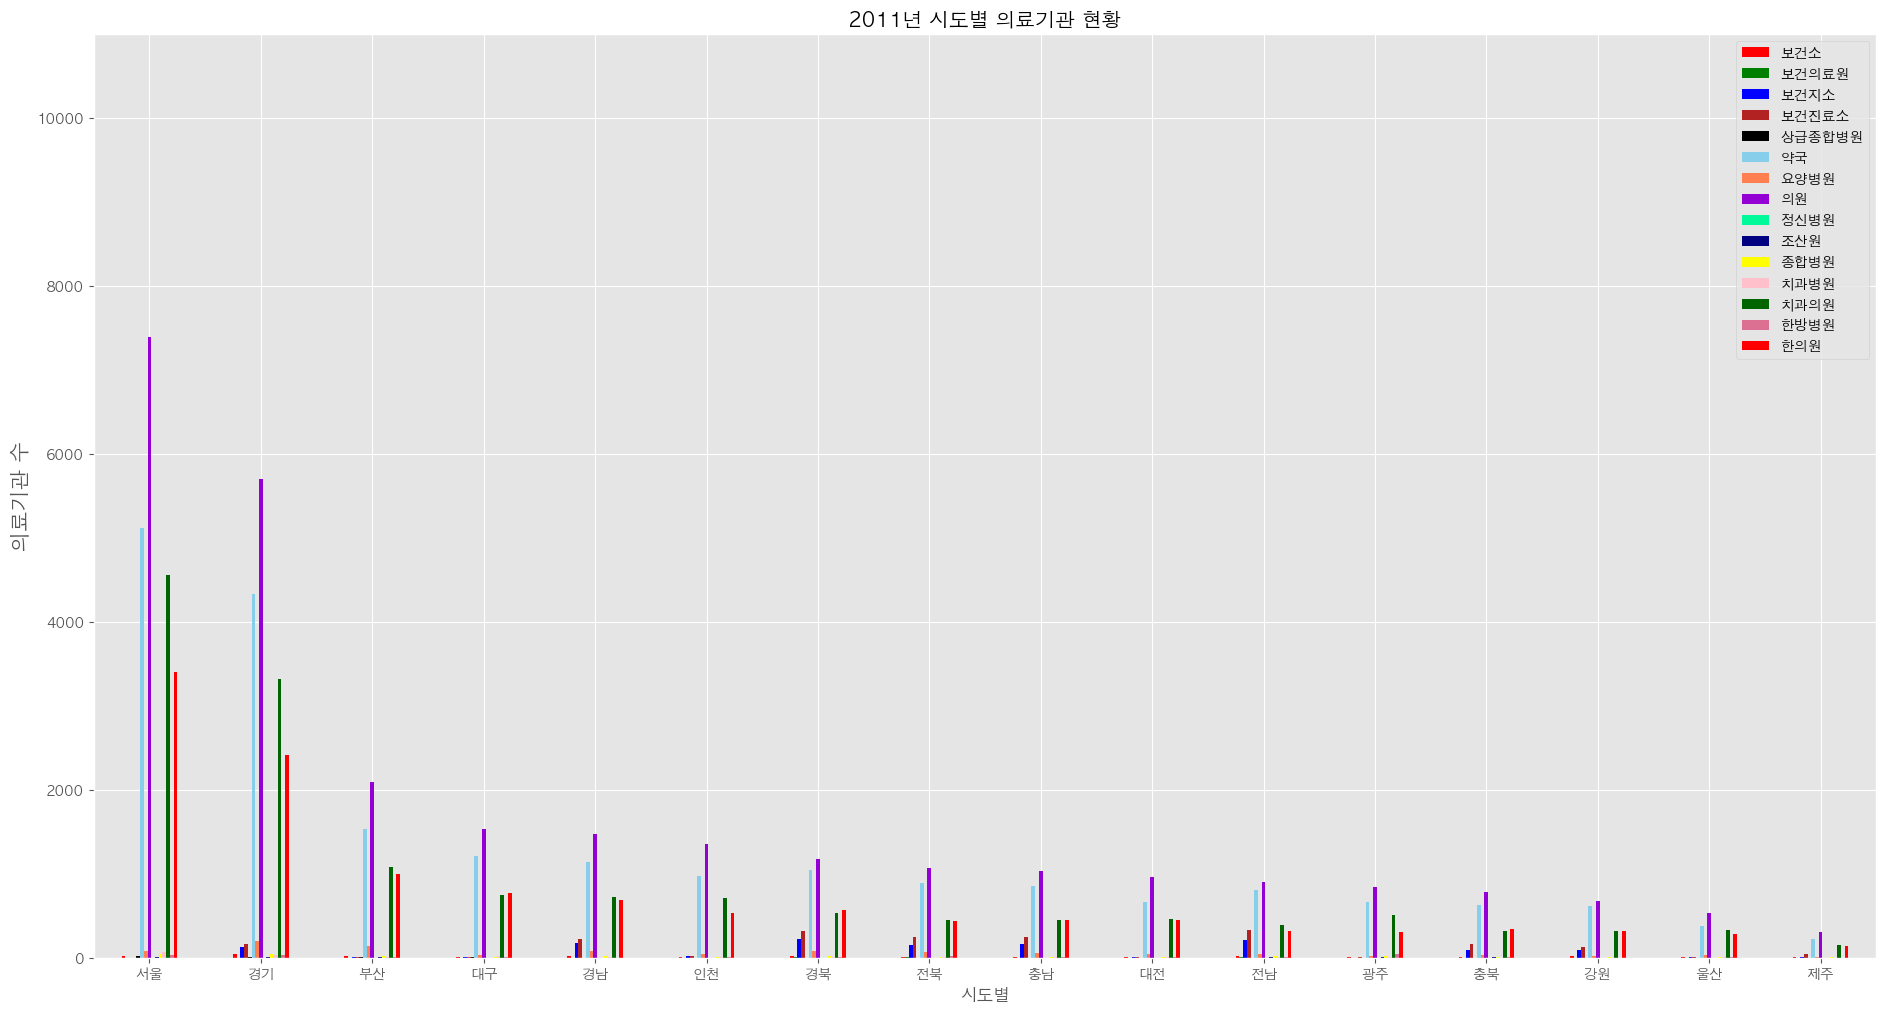

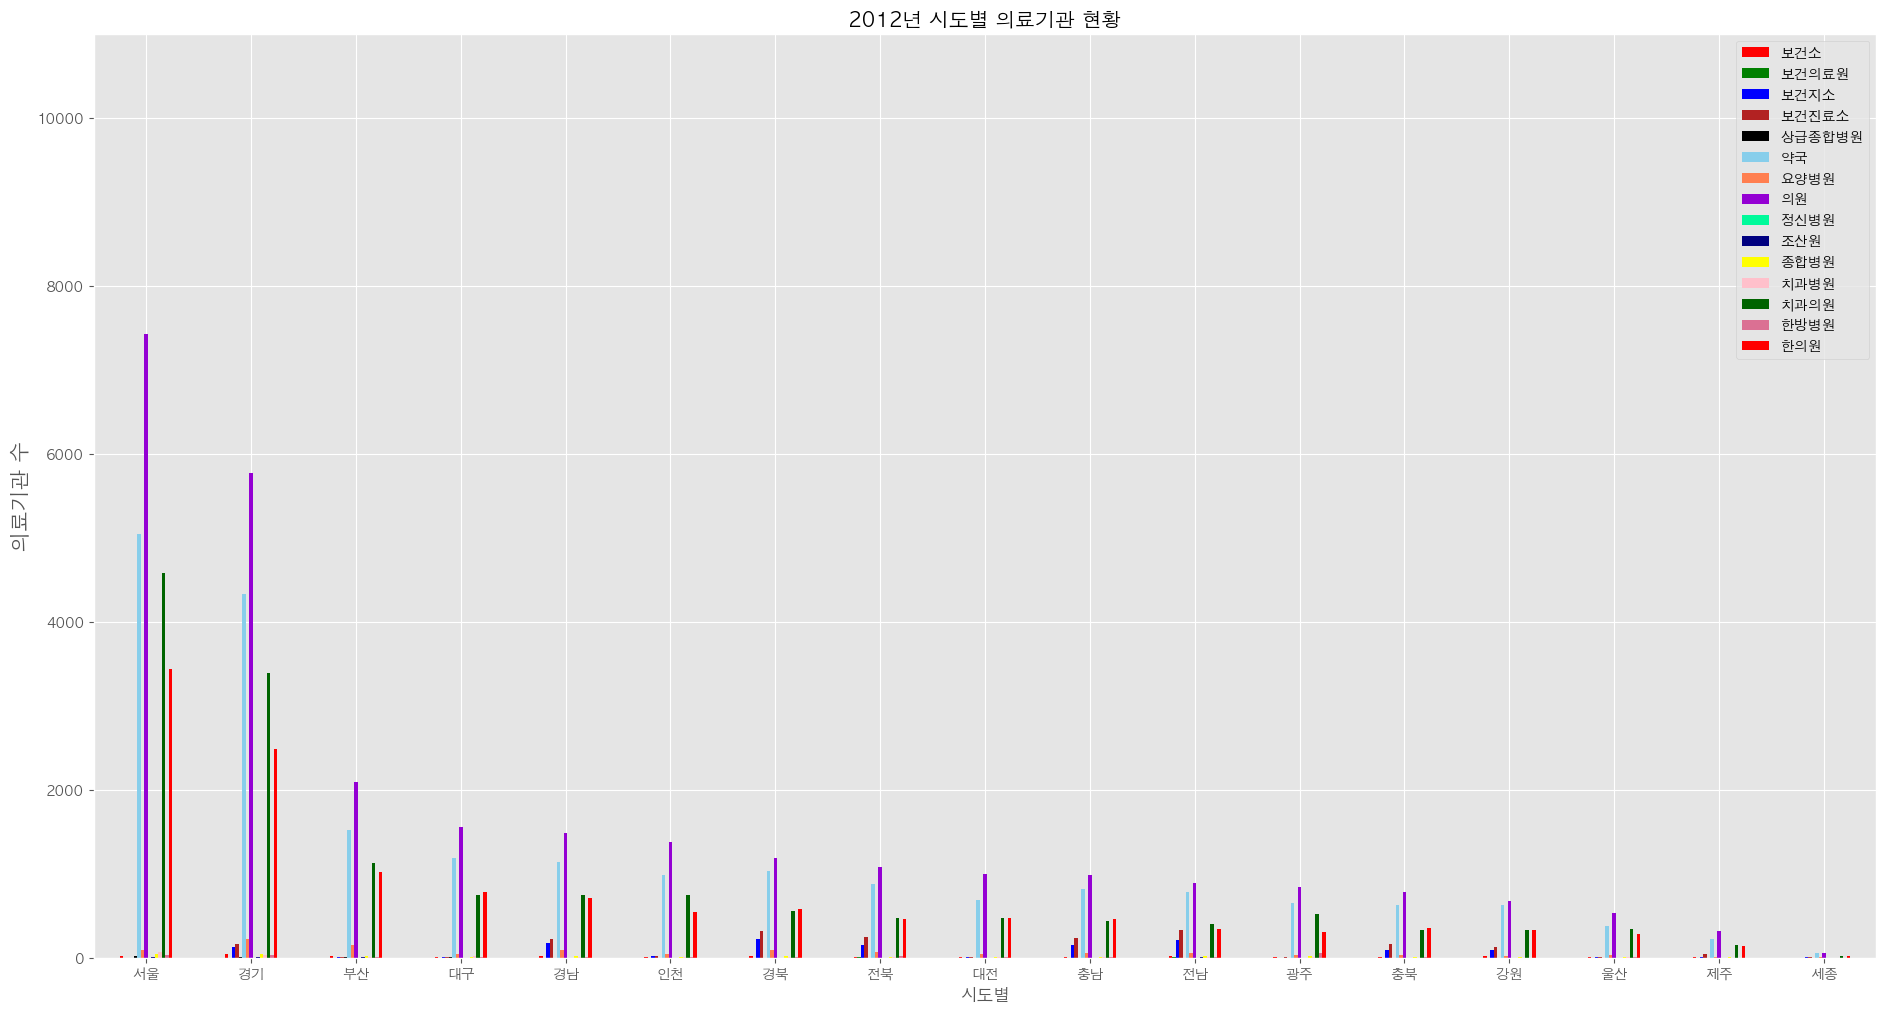

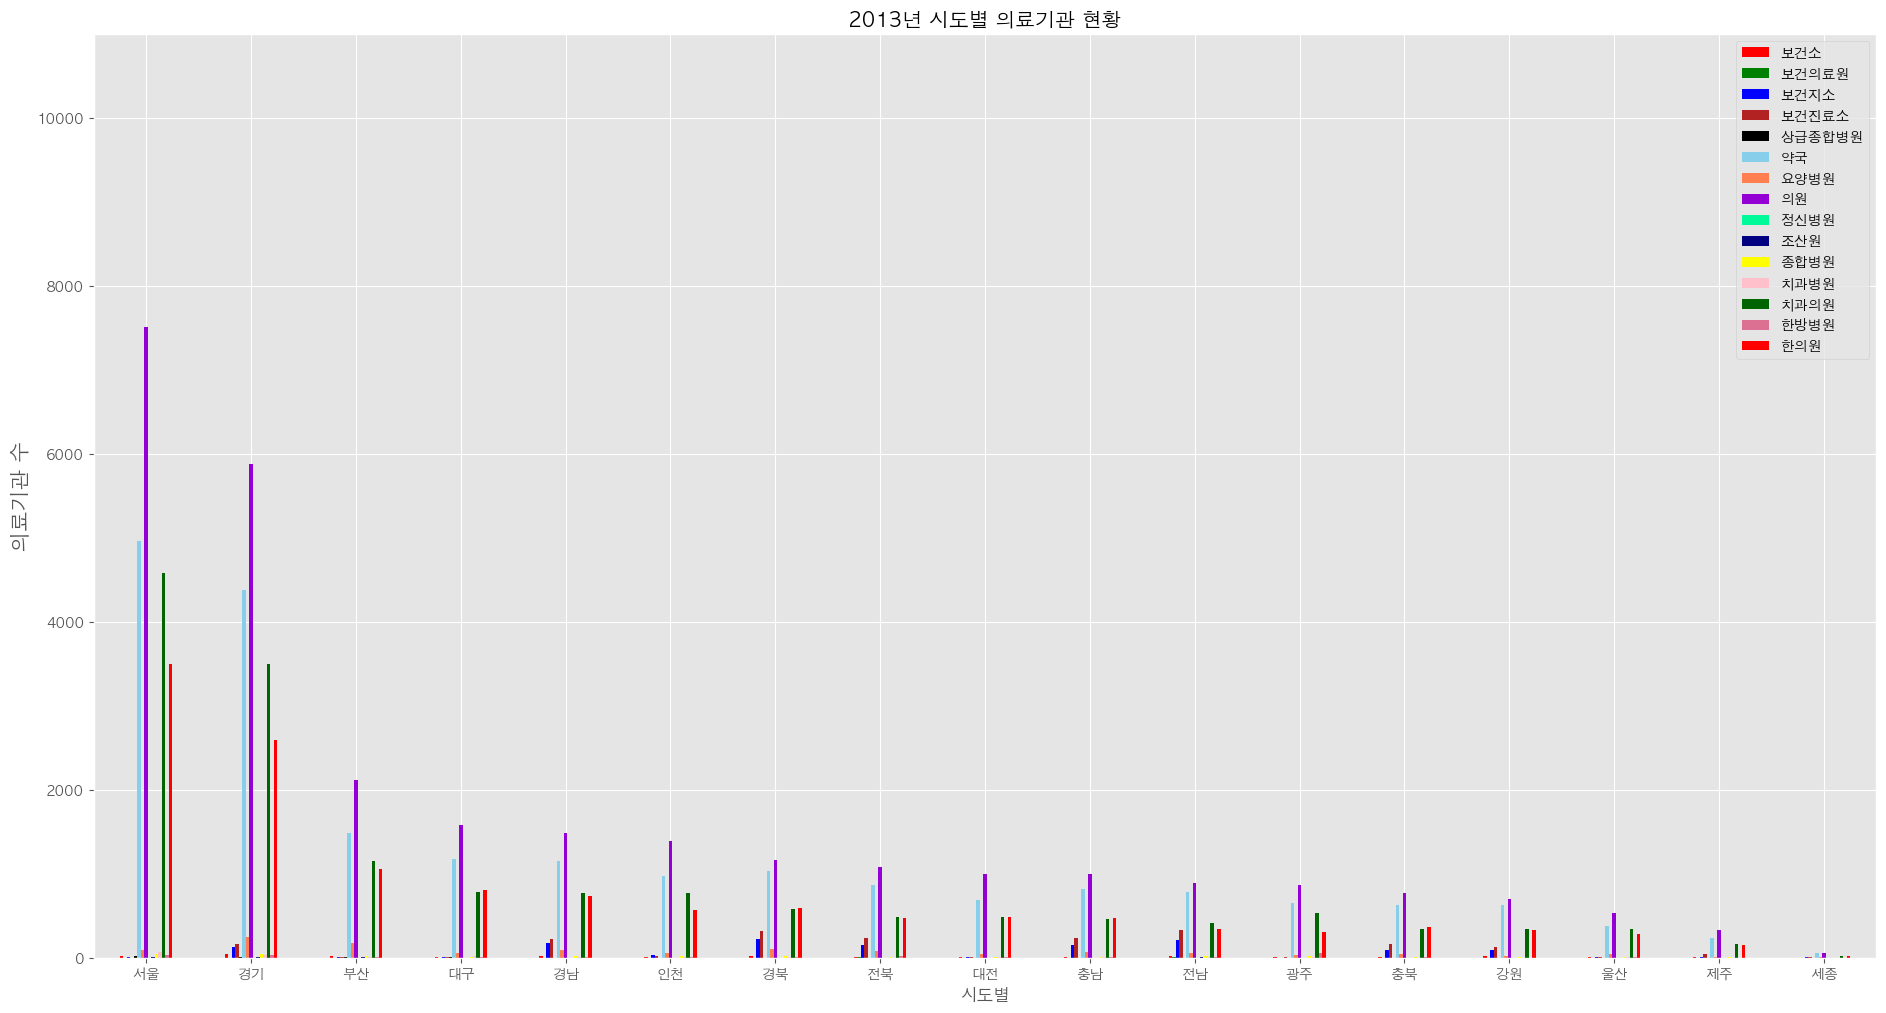

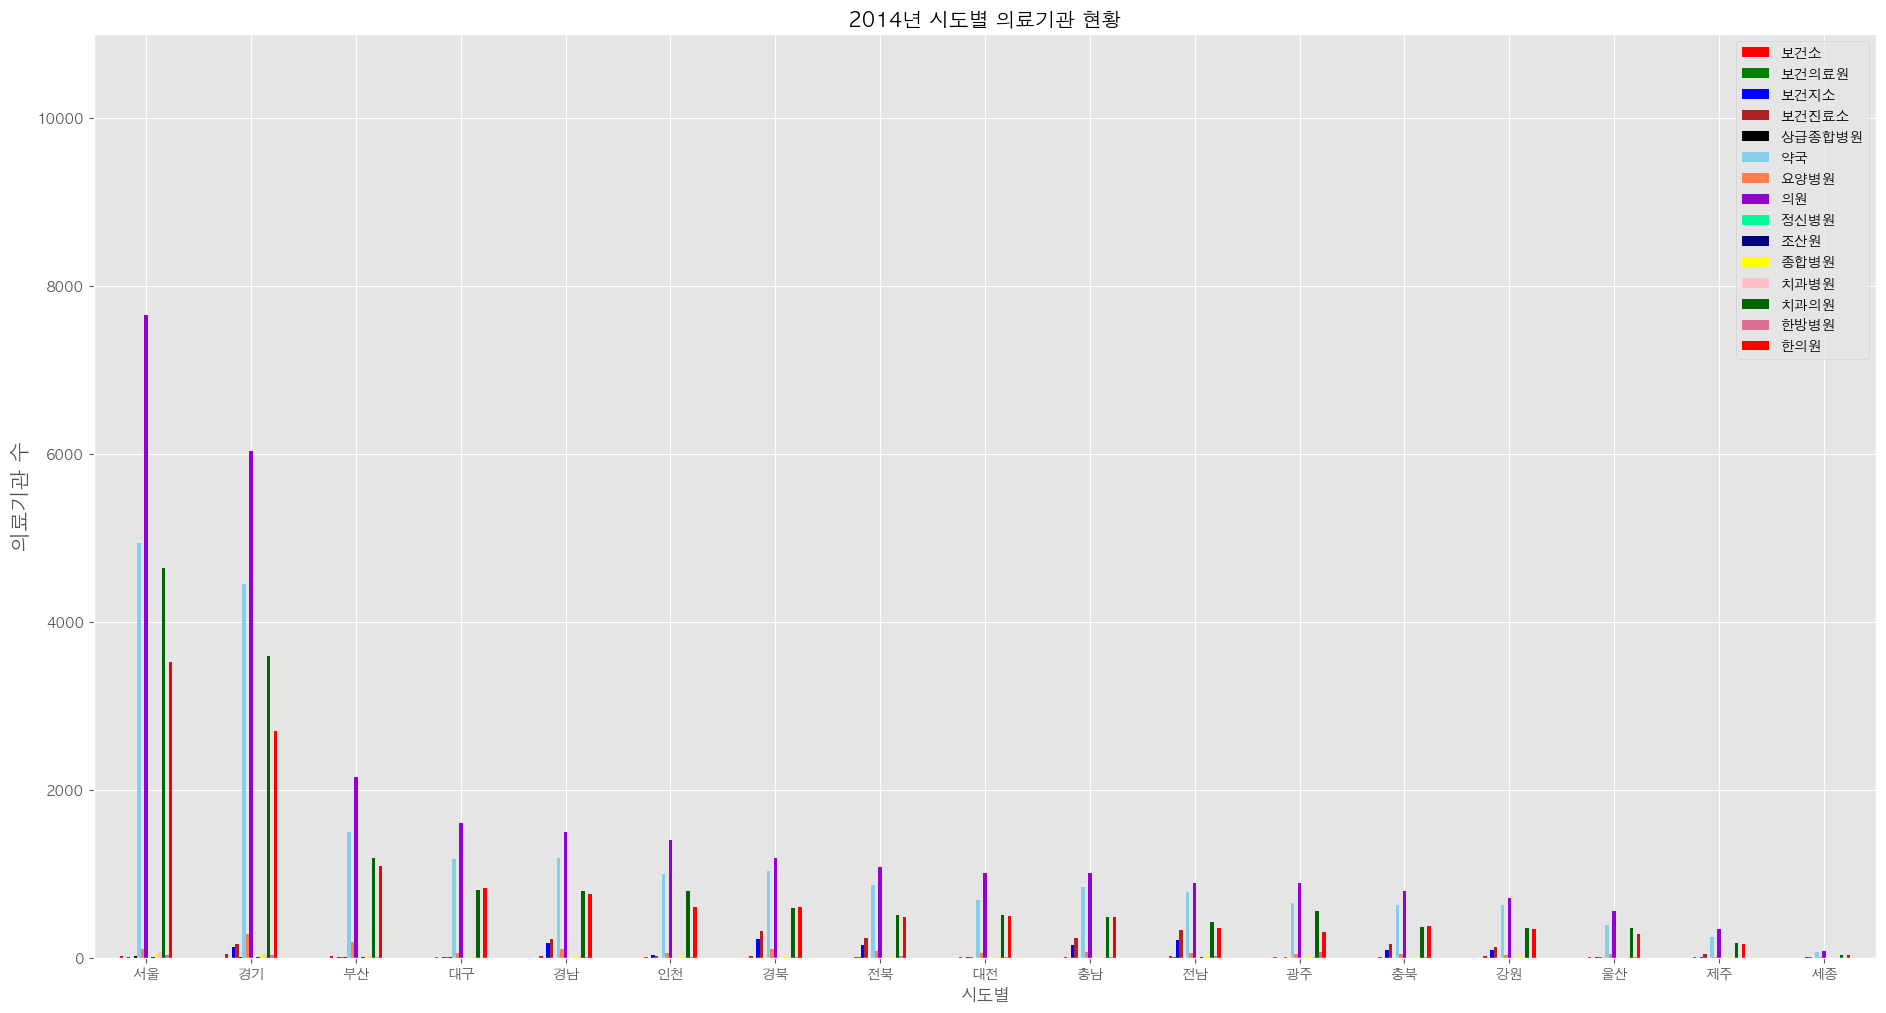

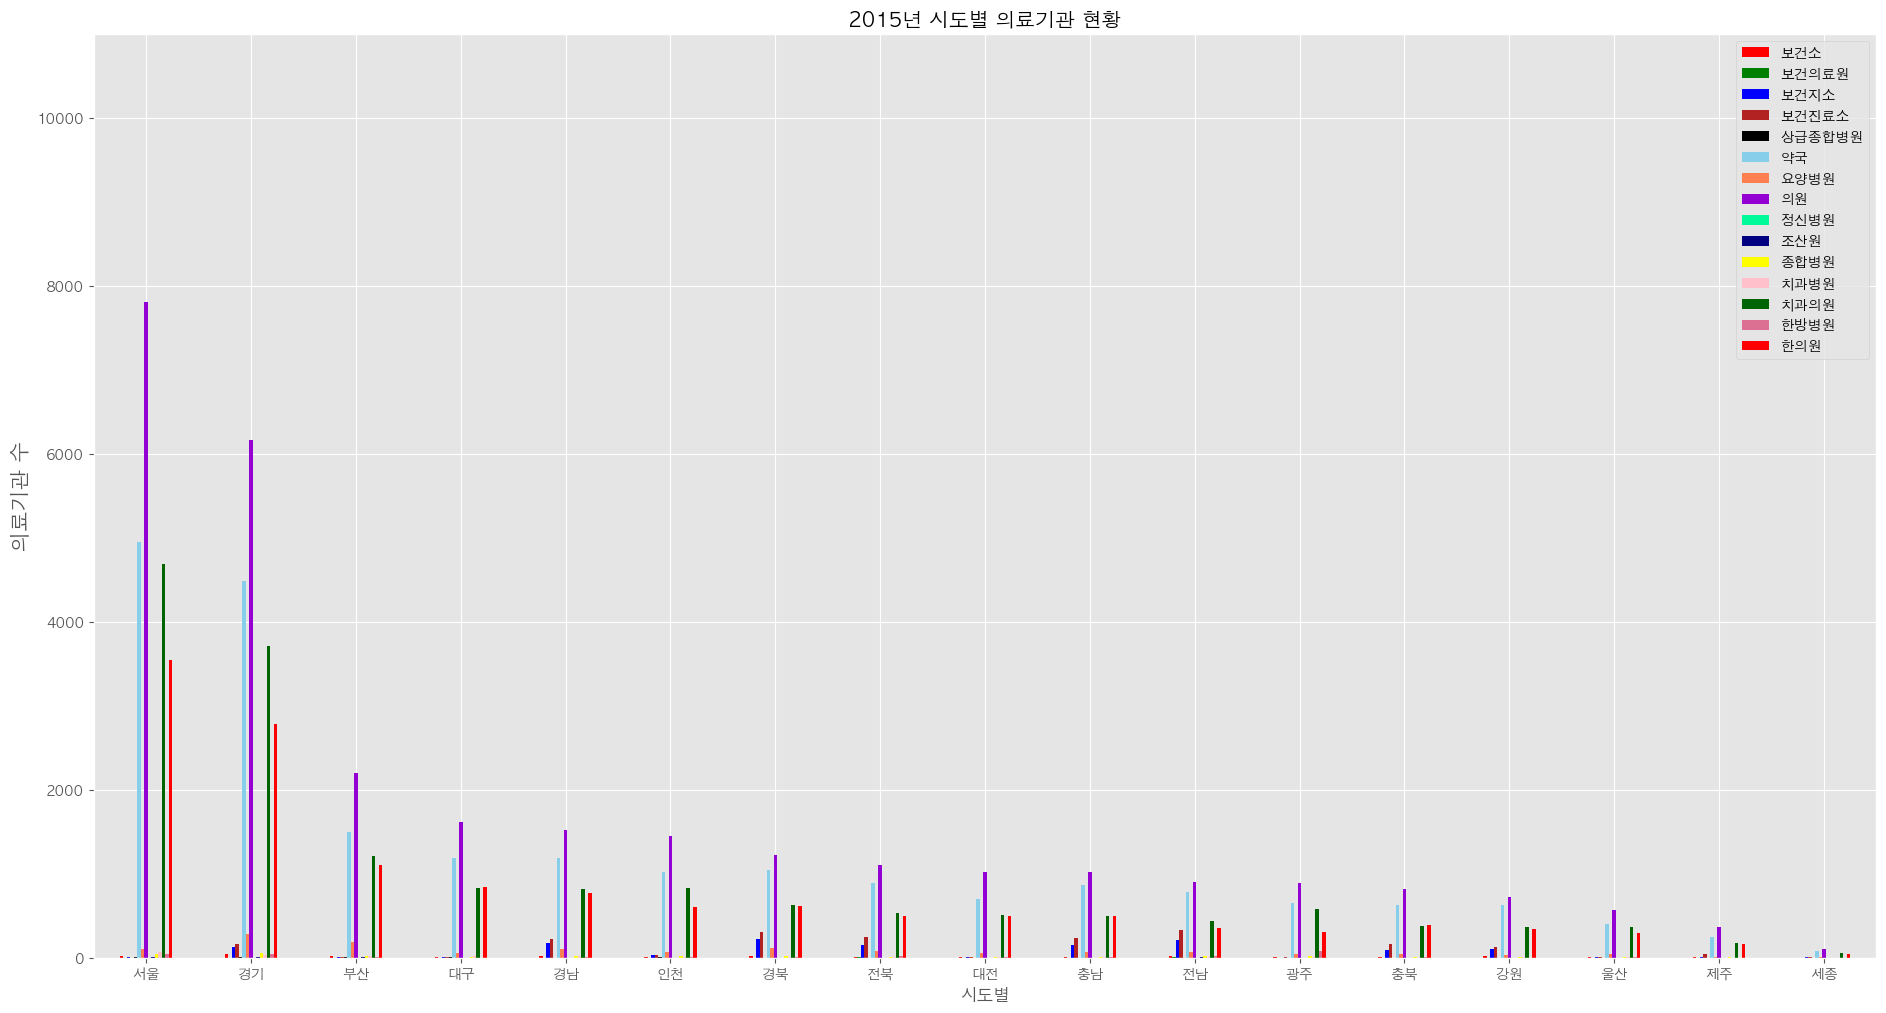

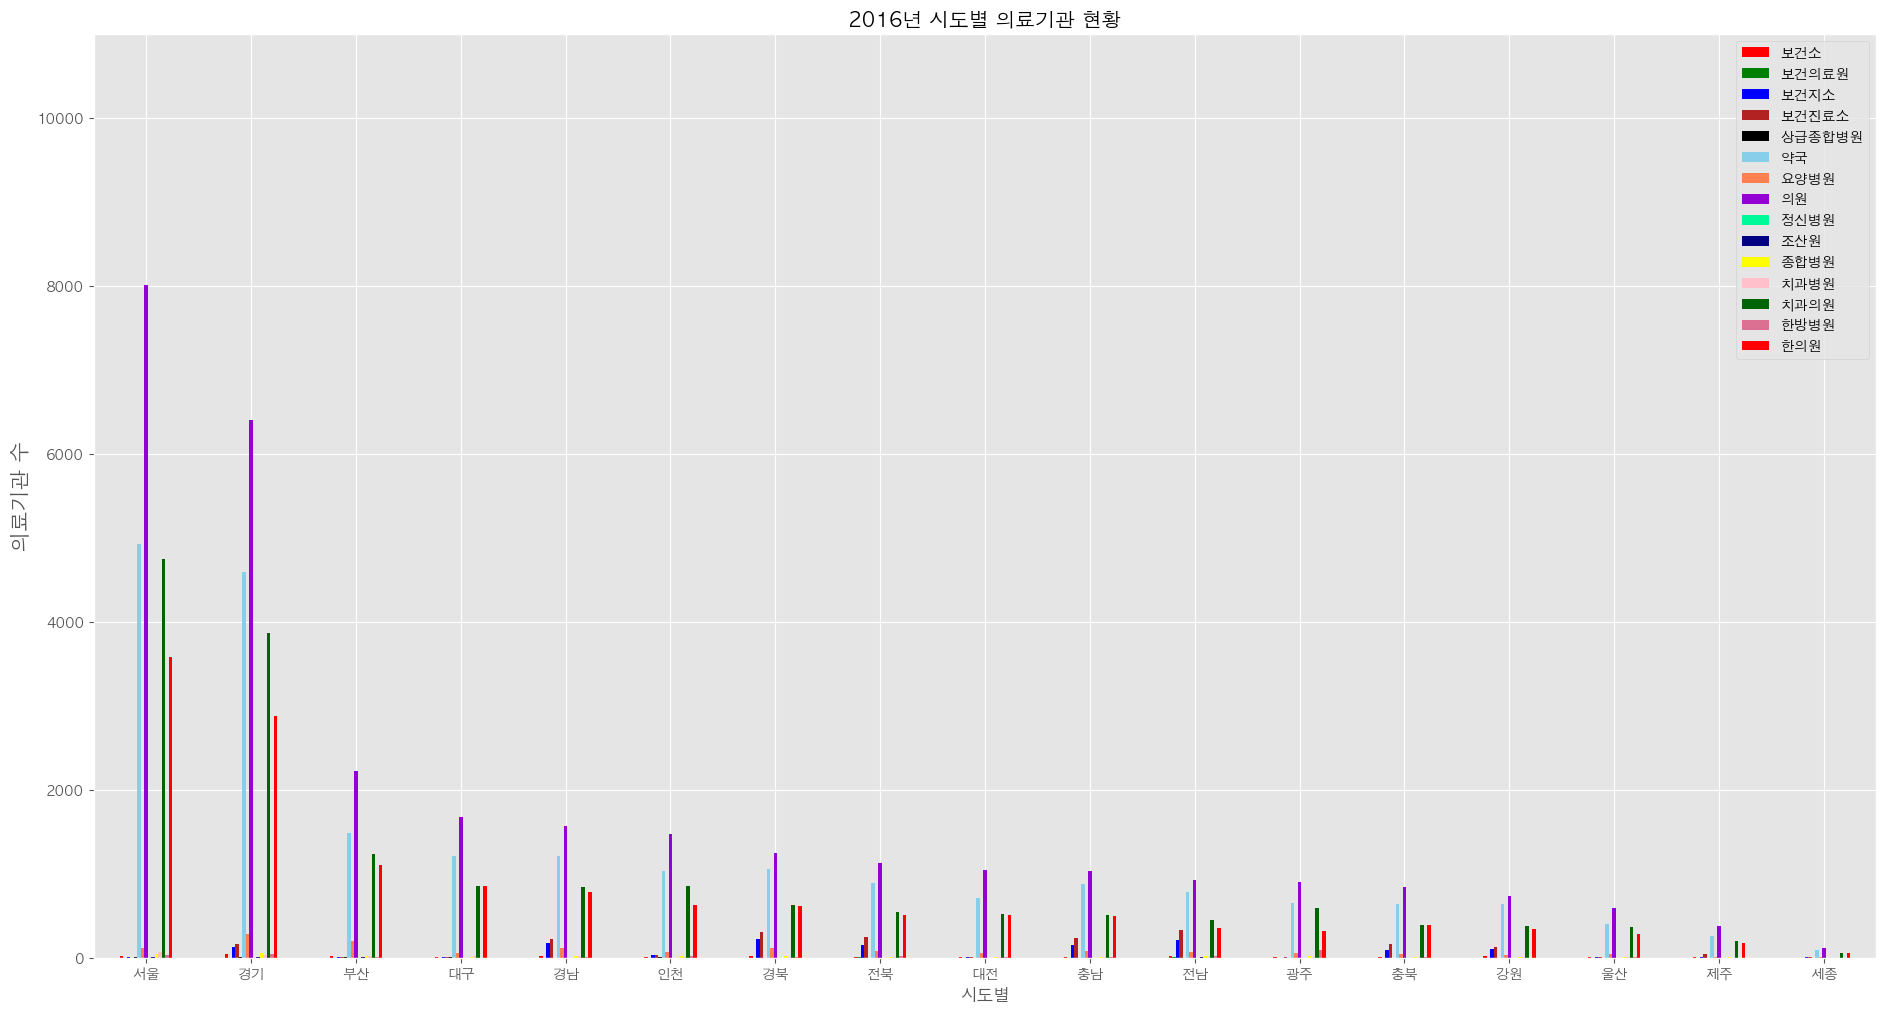

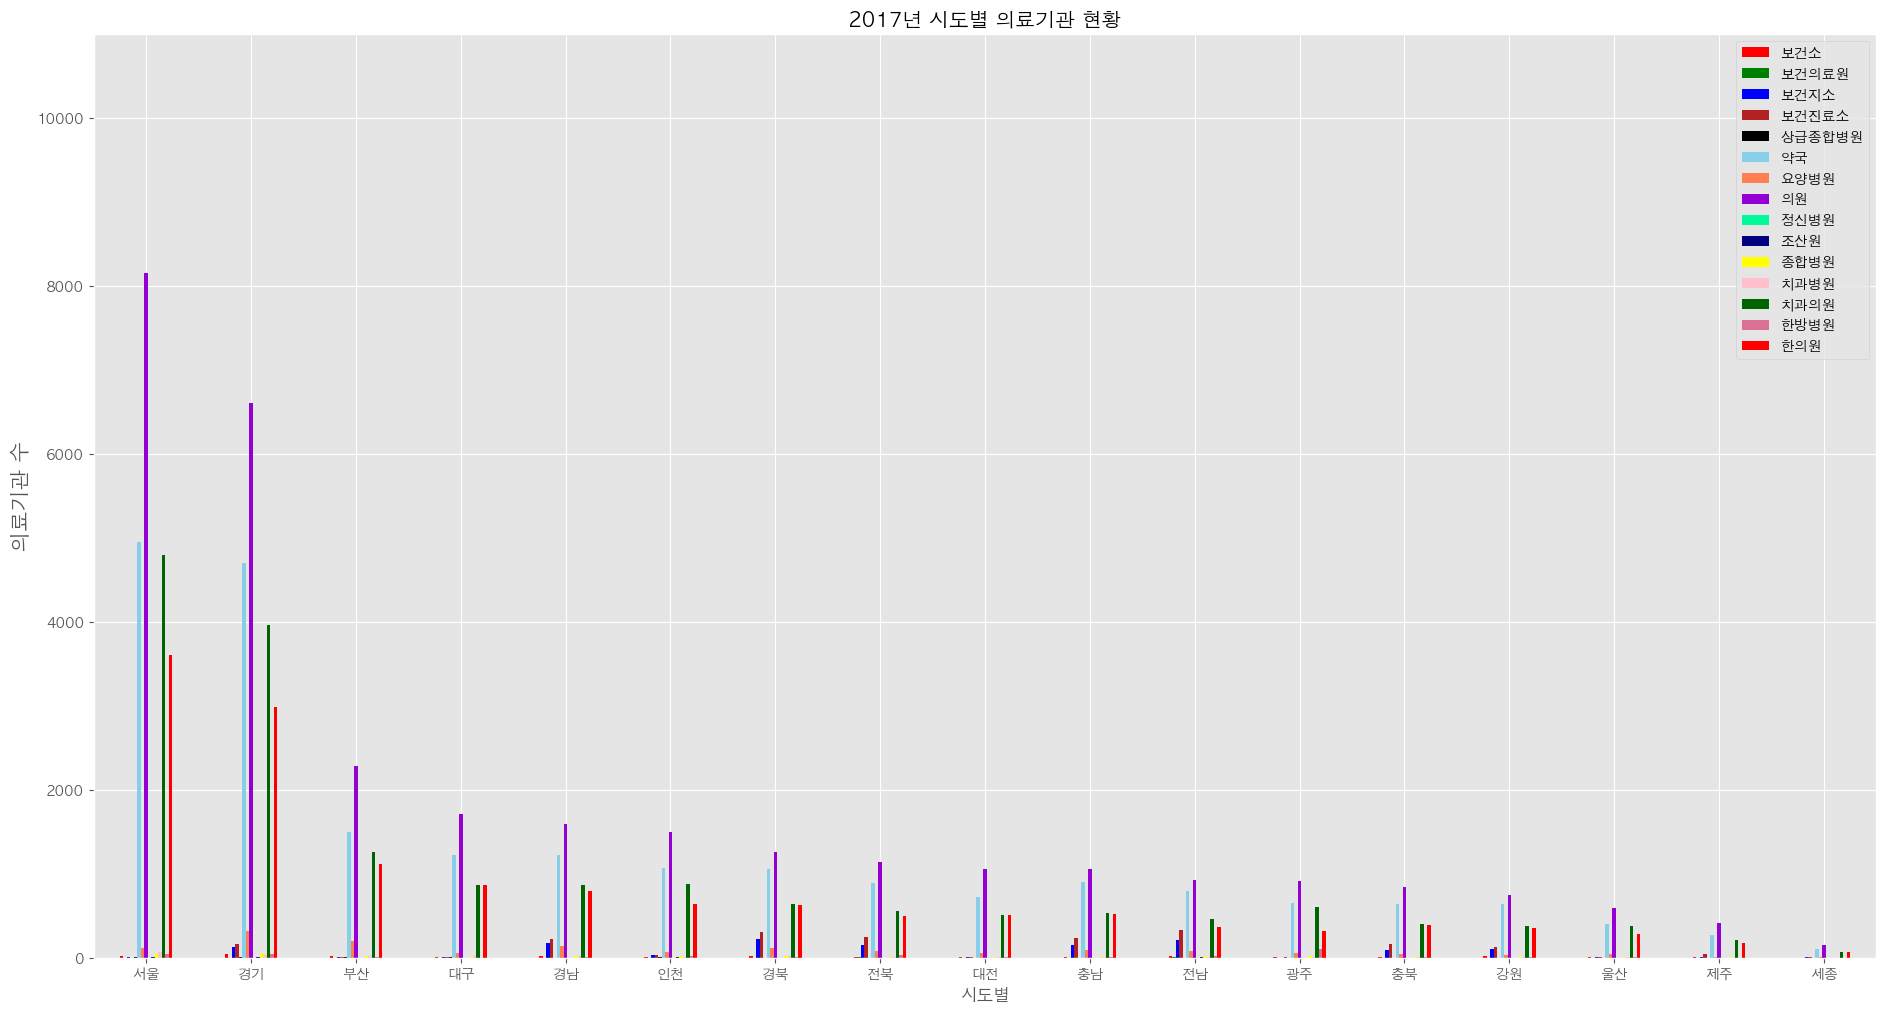

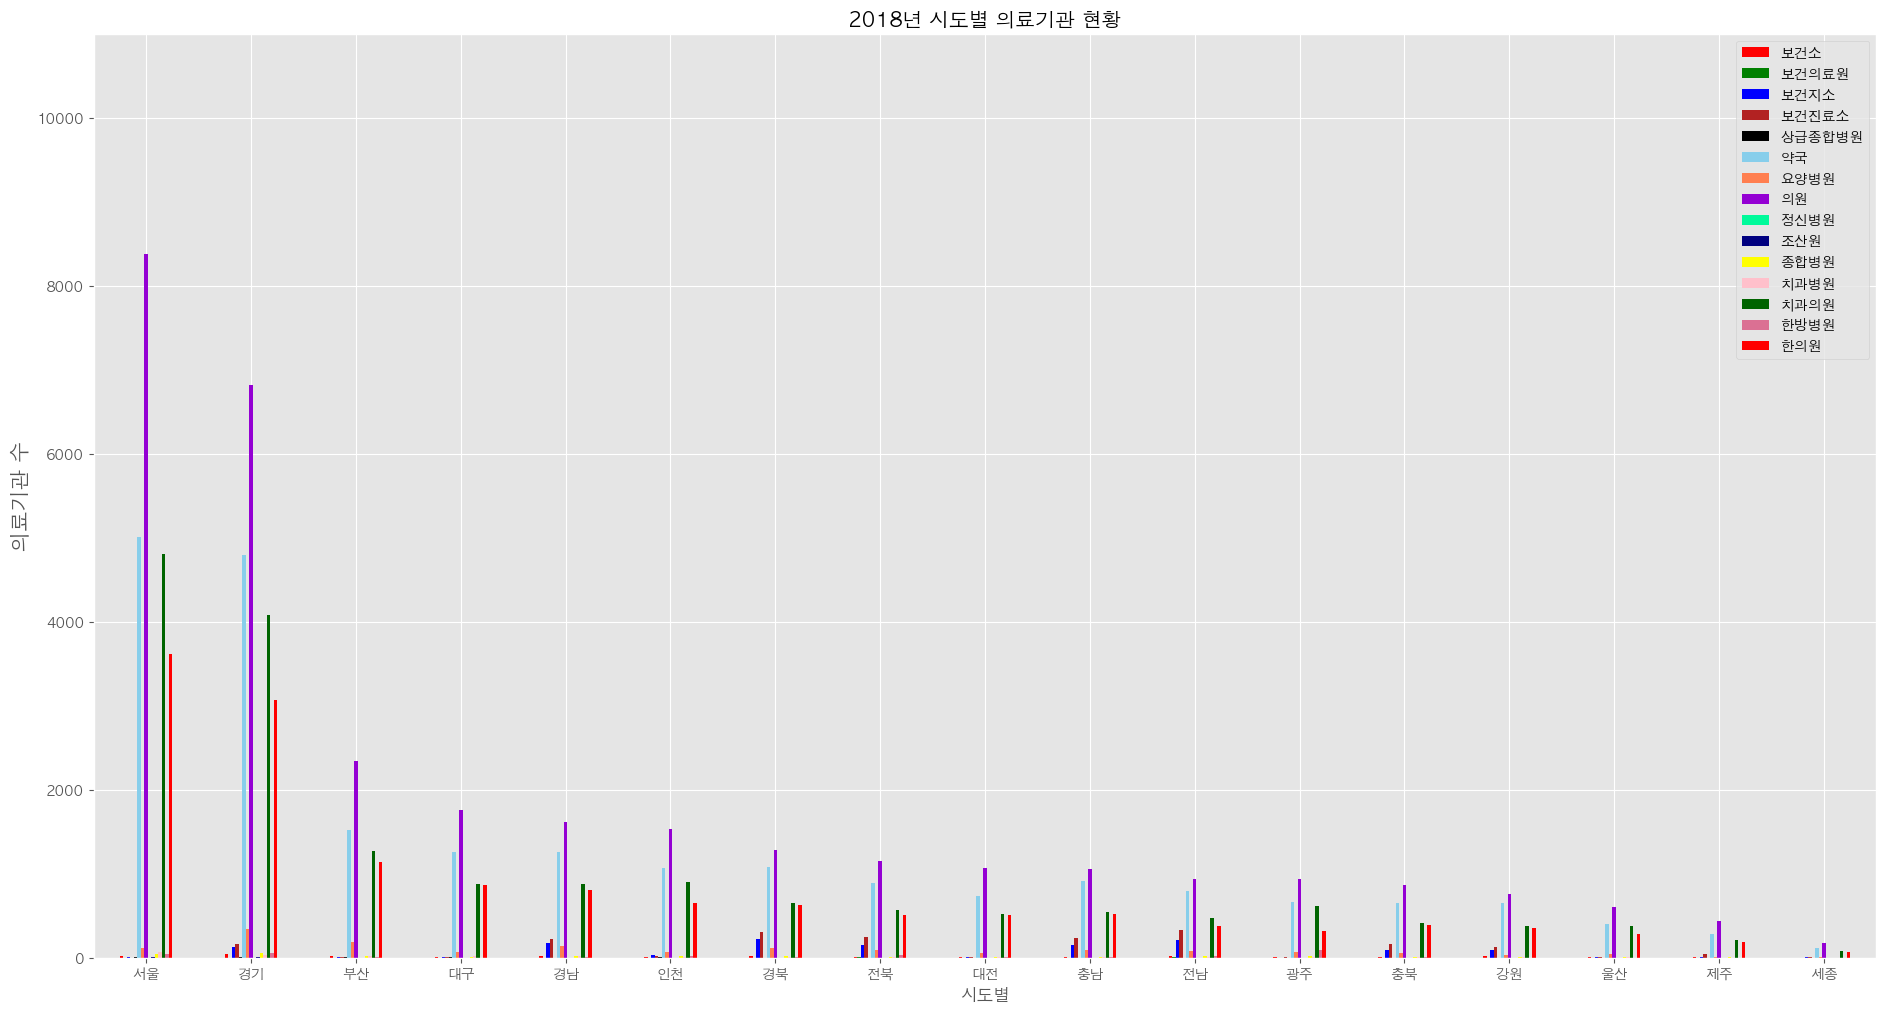

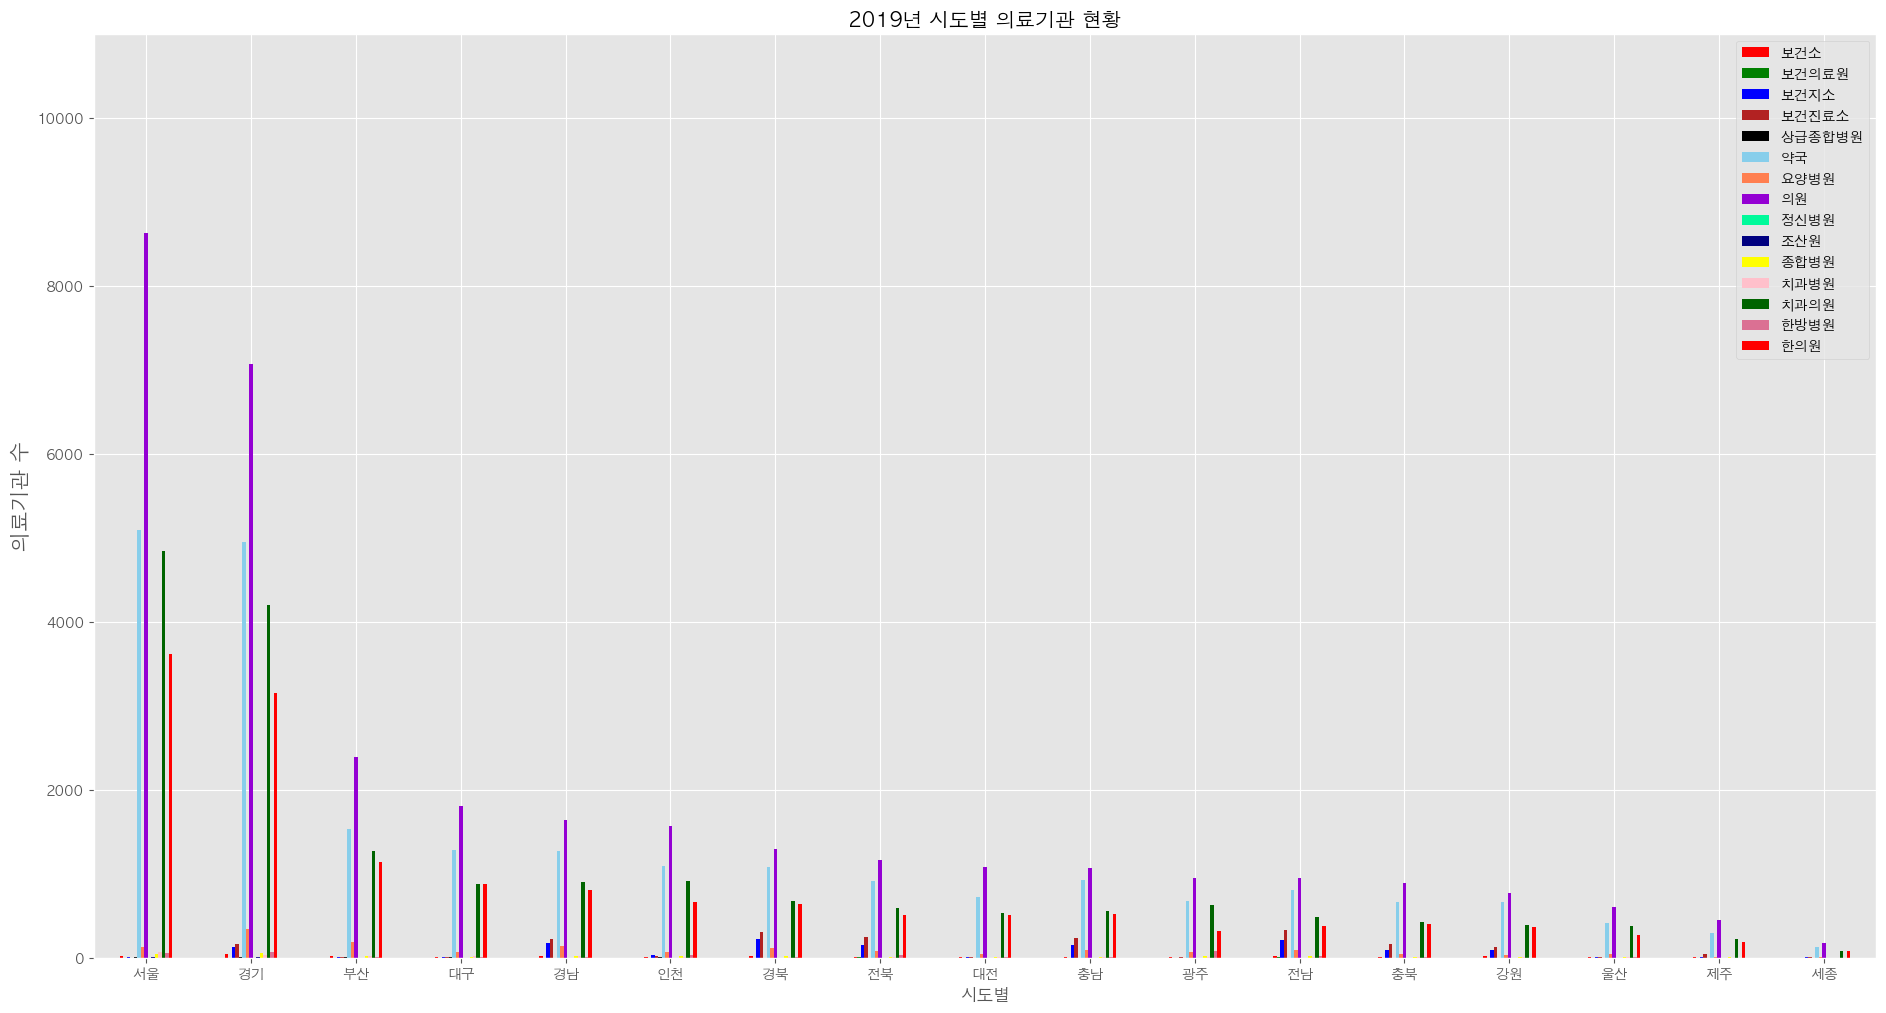

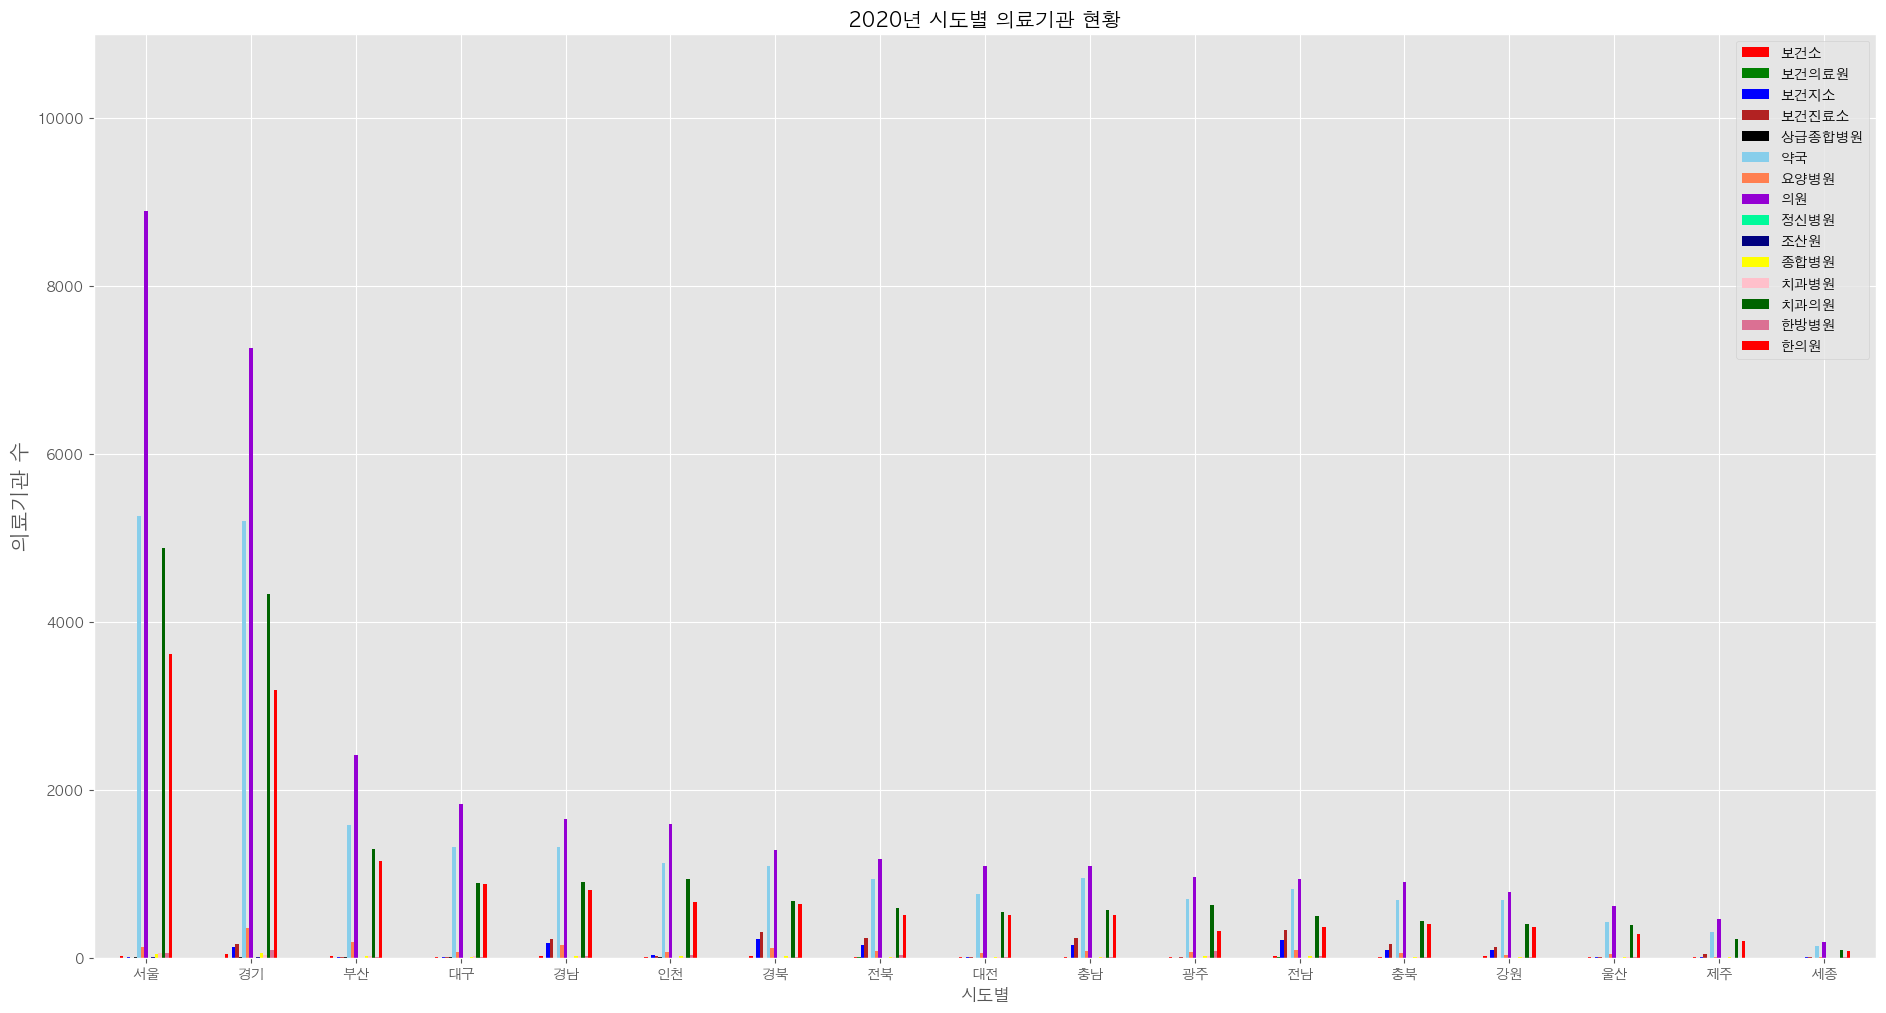

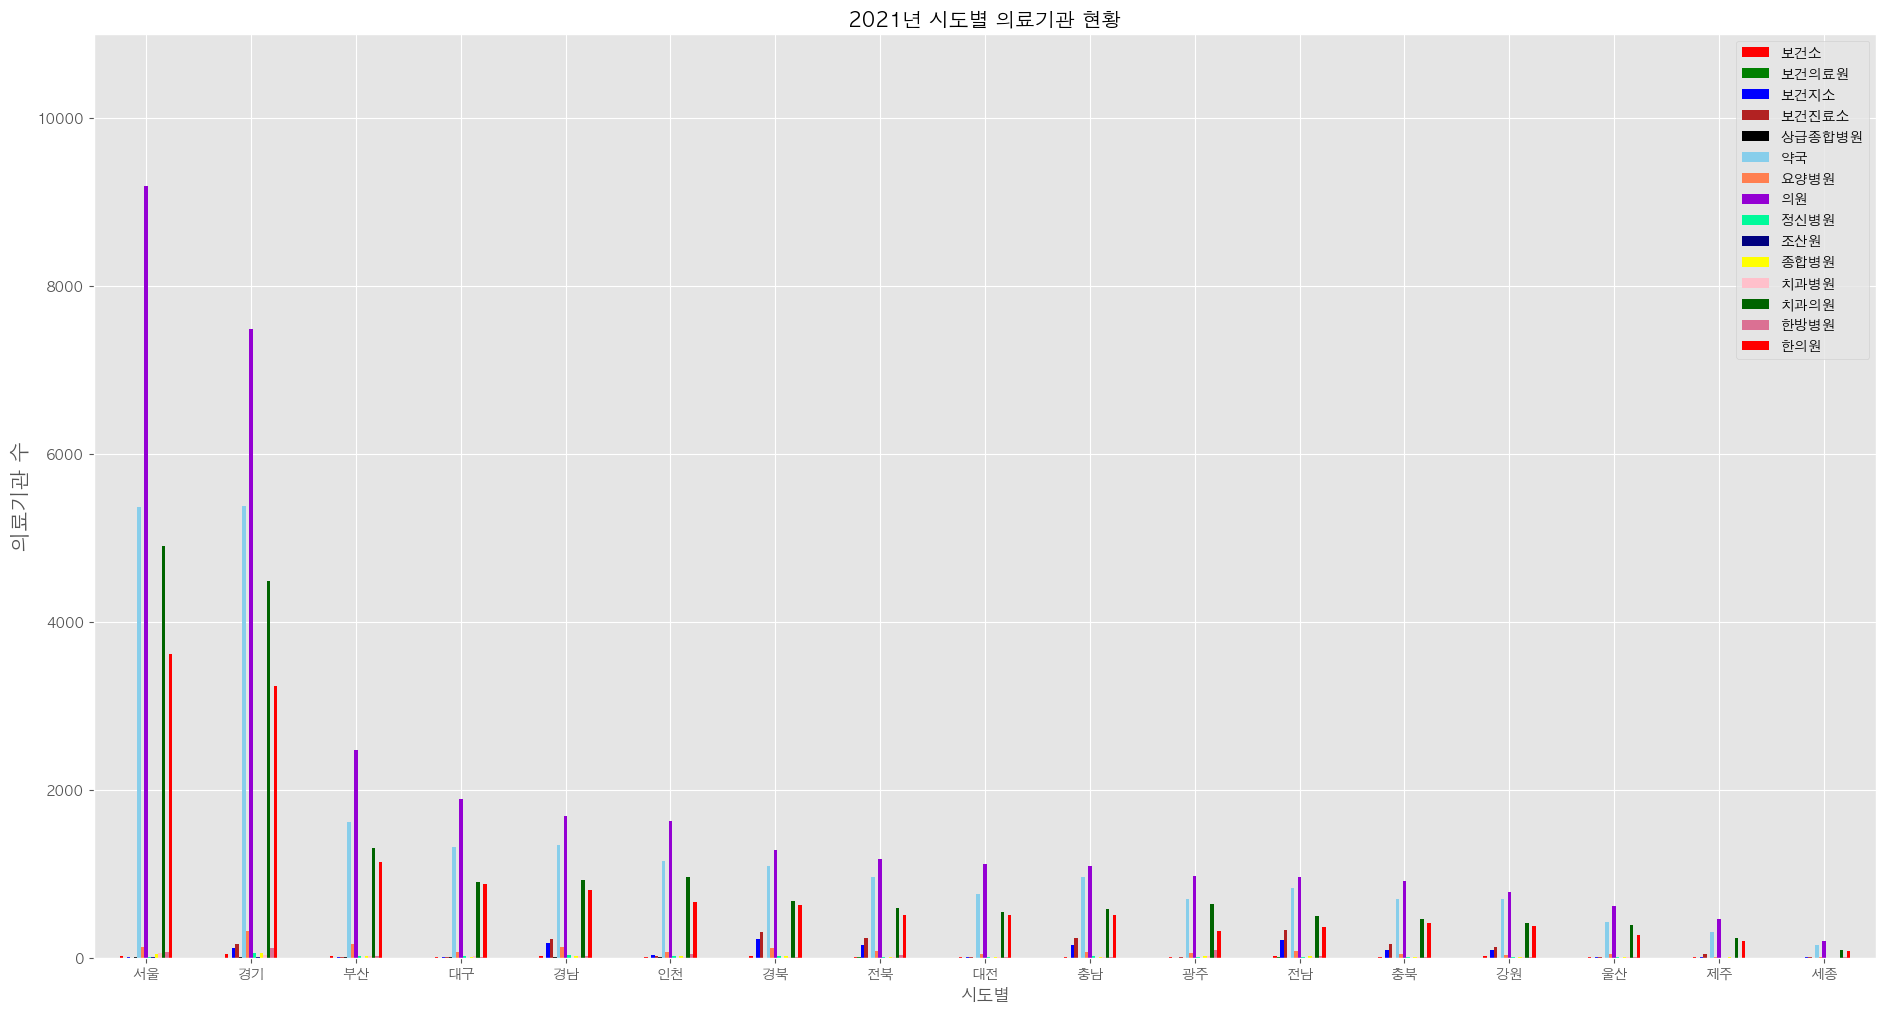

In [12]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
# years = [y for y in range(2020,2022)]
years = [y for y in range(2011,2022)]
for year in years:
    titleYear = year
    year = hospital2022[hospital2022.index==year].sort_index(ascending=False)
    year.set_index(keys=year['시도별'], inplace=True,drop=True)
    year = year.iloc[:,1:]
    year = year.sort_values(by='의원',ascending=False)
    plt.style.use('ggplot')
    year.plot(
        kind='bar', 
        figsize=(23,12),
        color = colors,
        )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("의료기관 수", size=15)
    plt.title('%d년 시도별 의료기관 현황' %titleYear)
    plt.ylim(0,11000)
    plt.show()


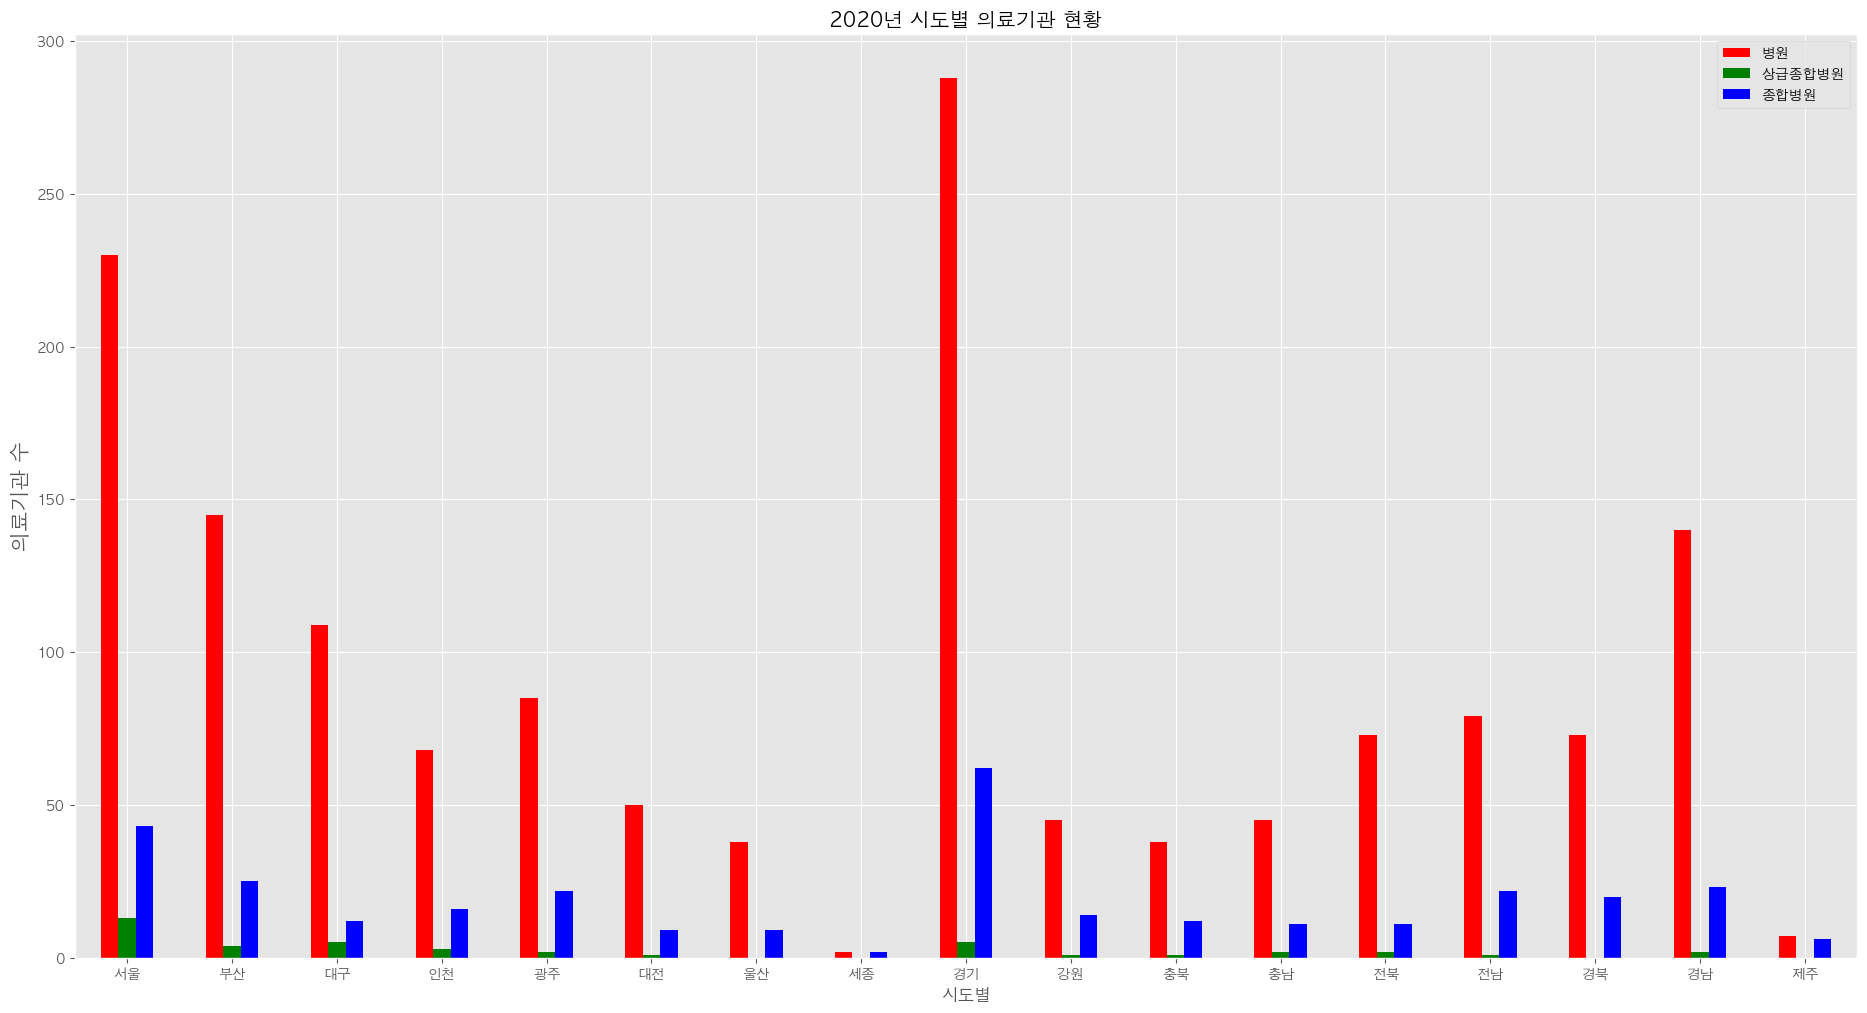

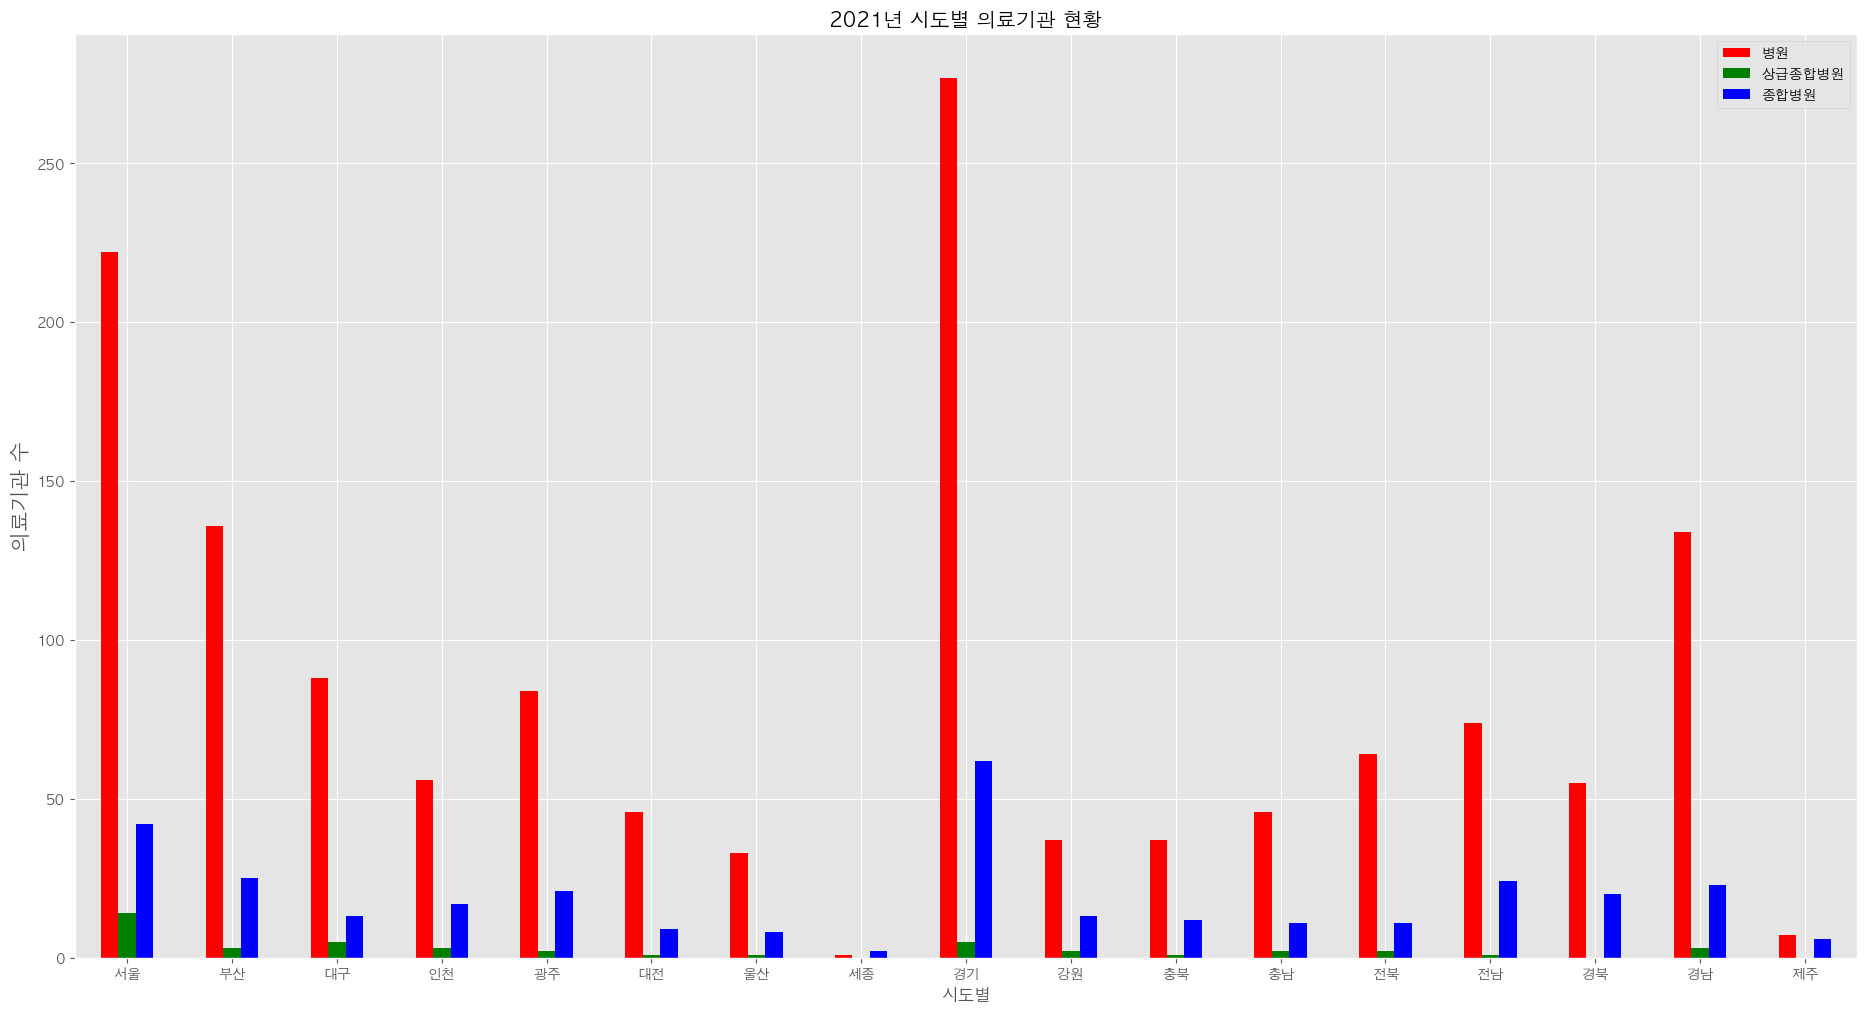

In [13]:
colors = ['red','green','blue','firebrick','black','skyblue','coral','darkviolet','mediumspringgreen','navy','yellow','pink','darkgreen','palevioletred']
years = [y for y in range(2020,2022)]
# years = [y for y in range(2011,2022)]
for year in years:
    titleYear = year
    year = hospital2022[hospital2022.index==year][['병원','상급종합병원','종합병원','시도별']]#.sort_index(ascending=False)
    year.set_index(keys=year['시도별'], inplace=True,drop=True)
    # year = year.iloc[:,1:]
    # year = year.sort_values(by='시도별',ascending=False)
    plt.style.use('ggplot')
    year.plot(
        kind='bar', 
        figsize=(23,12),
        color = colors,
        )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("의료기관 수", size=15)
    plt.title('%d년 시도별 의료기관 현황' %titleYear)
    # plt.ylim(0,11000)
    plt.show()


In [14]:
hospital2022 = hospital2022[['병원','상급종합병원','종합병원','의원','시도별']]

In [15]:
hospital2022.to_csv('../../Data/public health/hosik_병원수_2009_2022.csv', encoding='utf-8', index=True)